In [1]:
import csv

import numpy as np
import matplotlib.pyplot as plt

## Question 1 code

In [2]:
R_s = 6
V_in = 25
I_in = V_in/R_s

In [3]:
R_L = np.arange(1,100)
V_out = V_in*(R_L/(R_L+R_s))

print(V_out)

I_out = (V_in - V_out) / R_s


[ 3.57142857  6.25        8.33333333 10.         11.36363636 12.5
 13.46153846 14.28571429 15.         15.625      16.17647059 16.66666667
 17.10526316 17.5        17.85714286 18.18181818 18.47826087 18.75
 19.         19.23076923 19.44444444 19.64285714 19.82758621 20.
 20.16129032 20.3125     20.45454545 20.58823529 20.71428571 20.83333333
 20.94594595 21.05263158 21.15384615 21.25       21.34146341 21.42857143
 21.51162791 21.59090909 21.66666667 21.73913043 21.80851064 21.875
 21.93877551 22.         22.05882353 22.11538462 22.16981132 22.22222222
 22.27272727 22.32142857 22.36842105 22.4137931  22.45762712 22.5
 22.54098361 22.58064516 22.61904762 22.65625    22.69230769 22.72727273
 22.76119403 22.79411765 22.82608696 22.85714286 22.88732394 22.91666667
 22.94520548 22.97297297 23.         23.02631579 23.05194805 23.07692308
 23.10126582 23.125      23.14814815 23.17073171 23.19277108 23.21428571
 23.23529412 23.25581395 23.27586207 23.29545455 23.31460674 23.33333333
 23.3516483

Text(0, 0.5, 'I_{out} (A)')

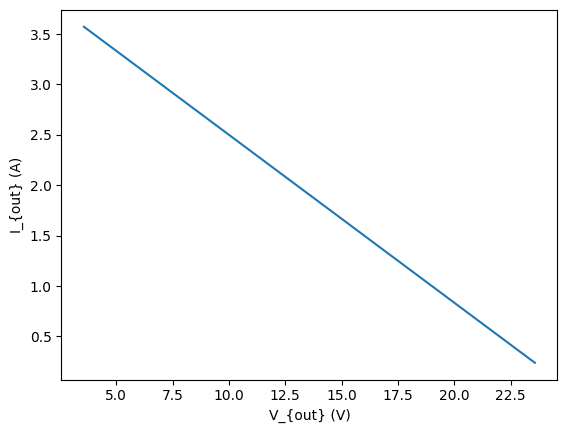

In [4]:
fig, ax = plt.subplots()
ax.plot(V_out, I_out)
ax.set_xlabel('V_{out} (V)')
ax.set_ylabel('I_{out} (A)')

In [5]:
p = I_out * V_out

max_idx = np.argmax(p)
power_max = np.max(p)
print(max_idx, power_max)
print(I_out[max_idx], V_out[max_idx])

5 26.041666666666668
2.0833333333333335 12.5


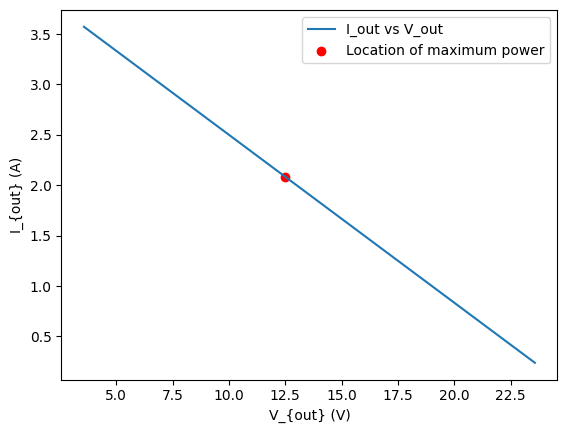

In [6]:
fig, ax = plt.subplots()
line, = ax.plot(V_out, I_out, label='I_out vs V_out')
ax.set_xlabel('V_{out} (V)')
ax.set_ylabel('I_{out} (A)')
dot = ax.scatter(V_out[max_idx], I_out[max_idx], label='Location of maximum power', color='red')
ax.legend(handles=[line, dot])

## Question 5 Code

# Parameters for 3 cases
1. Aug 5: tilt = 15.9°
2. Feb 9: tilt = 47.94°
3. Aug 5 west facing: tilt = 32.81°



In [7]:
def read_monthly_csv(file_path):
    data_rows = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        is_data_row = False
        
        for row in reader:
            if is_data_row:
                data = [float(i) for i in row[1:]] # skip first column of months
                data_rows.append(data) 
            else:
                if len(row) > 0 and row[0] == 'Month':
                    is_data_row = True

    array = np.array(data_rows).T
    return array

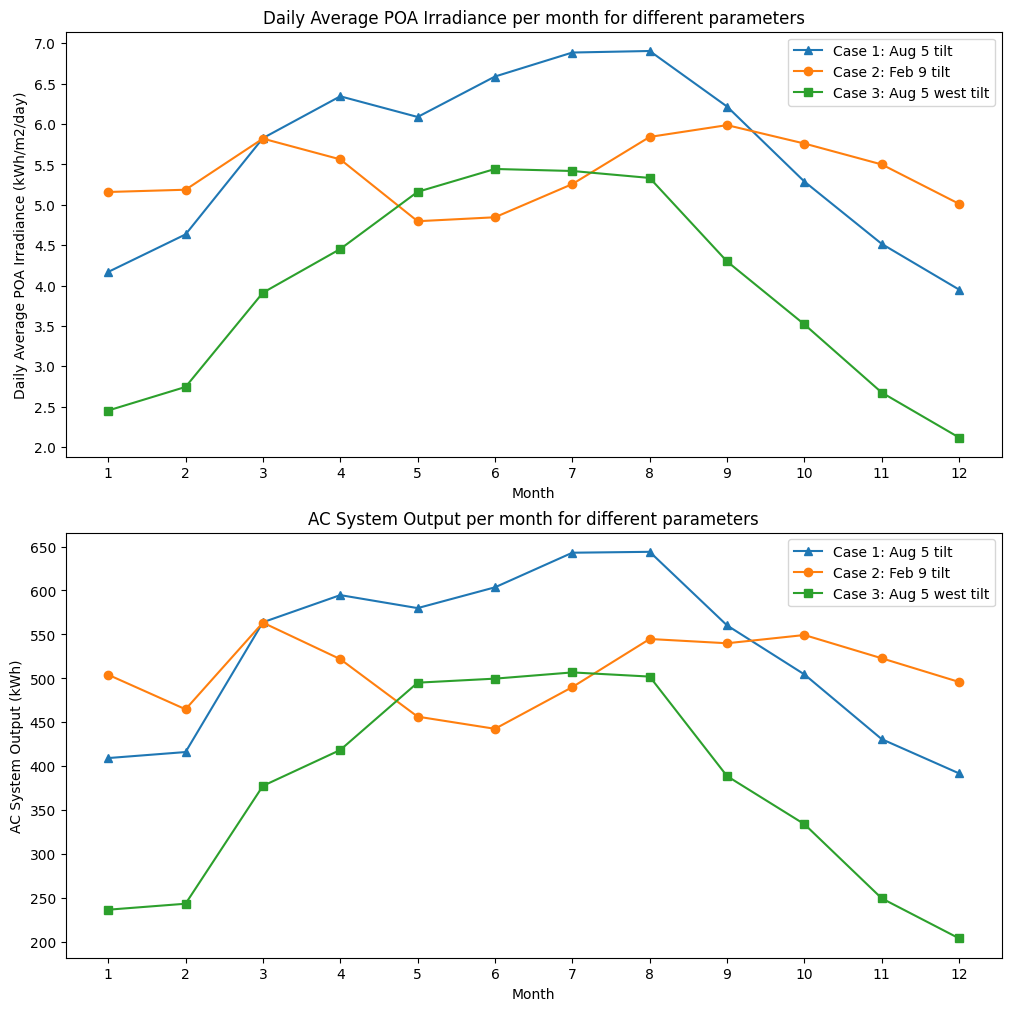

In [8]:
a1 = read_monthly_csv('pvwatts_monthly0805.csv')
a2 = read_monthly_csv('pvwatts_monthly0209.csv')
a3 = read_monthly_csv('pvwatts_monthly0805_west.csv')


fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10), layout='constrained')

# irradiance
ax1.plot(a1[0], marker='^', label='Case 1: Aug 5 tilt')
ax1.plot(a2[0], marker='o', label='Case 2: Feb 9 tilt')
ax1.plot(a3[0], marker='s', label='Case 3: Aug 5 west tilt')

# group_bar_graph(ax, data=[a[0], b[0], c[0]], labels=['Aug 5', 'Feb 9', 'Aug 5 west'])
ax1.set_title('Daily Average POA Irradiance per month for different parameters')
ax1.set_yticks(np.arange(2, 7.5, 0.5))
ax1.set_ylabel('Daily Average POA Irradiance (kWh/m2/day)')
ax1.set_xticks(np.arange(12), np.arange(12)+1)
ax1.set_xlabel('Month')
ax1.legend()


# AC output
ax2.plot(a1[2], marker='^', label='Case 1: Aug 5 tilt')
ax2.plot(a2[2], marker='o', label='Case 2: Feb 9 tilt')
ax2.plot(a3[2], marker='s', label='Case 3: Aug 5 west tilt')

ax2.set_title('AC System Output per month for different parameters')
ax2.set_yticks(np.arange(200, 700, 50))
ax2.set_ylabel('AC System Output (kWh)')
ax2.set_xticks(np.arange(12), np.arange(12)+1)
ax2.set_xlabel('Month')
ax2.legend()

In [9]:
def read_hourly_csv(file_path, month, day):
    data_rows = []
    with open(file_path, 'r') as file:
        reader = csv.reader(file)
        is_data_row = False
        
        for row in reader:
            if is_data_row:
                if int(row[0]) == month and int(row[1]) == day:
                    data = [float(i) for i in row[3:]] # skip first 3 column of months, days, and hours
                    data_rows.append(data)
                elif int(row[0]) > month:
                    break
            else:
                if len(row) > 0 and row[0] == 'Month':
                    is_data_row = True

    array = np.array(data_rows).T
    return array

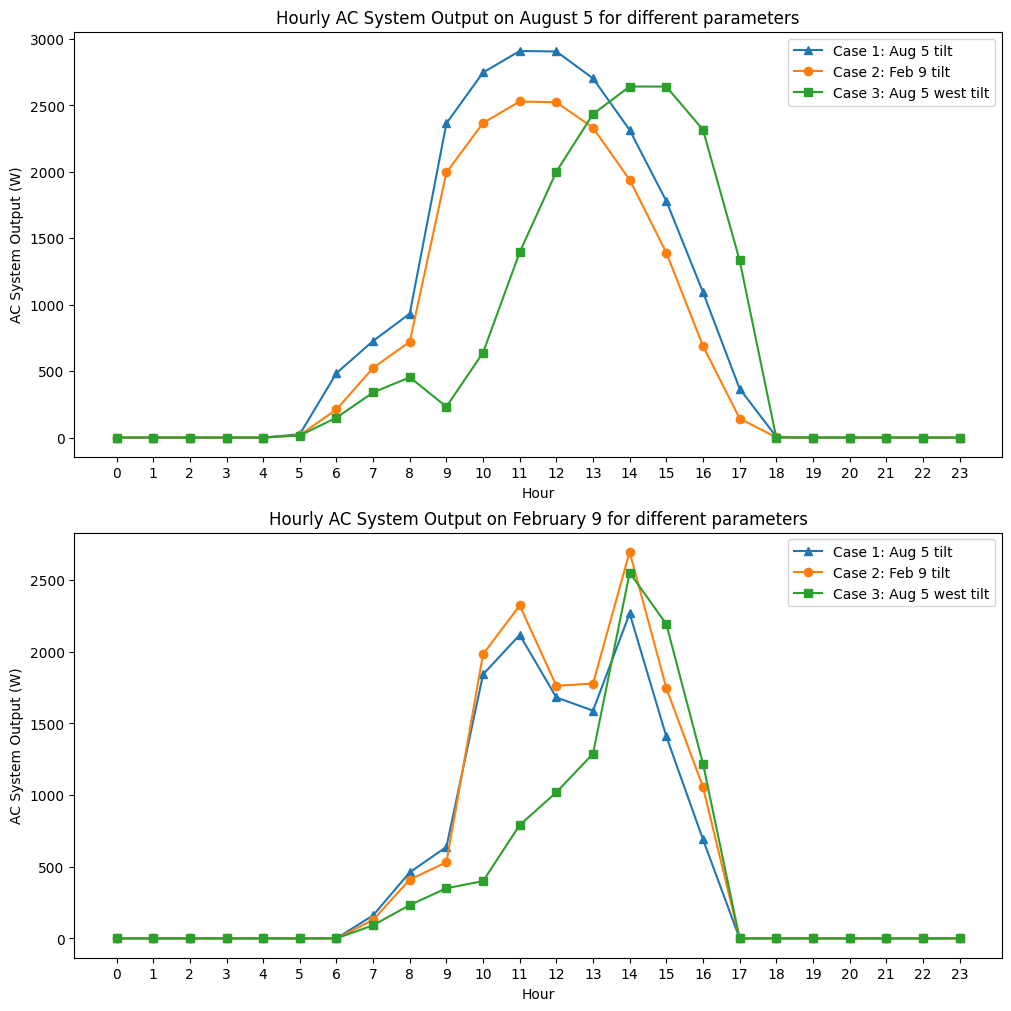

In [13]:
b1 = read_hourly_csv('pvwatts_hourly0805.csv', 8, 5)
b2 = read_hourly_csv('pvwatts_hourly0209.csv', 8, 5)
b3 = read_hourly_csv('pvwatts_hourly0805_west.csv', 8, 5)

c1 = read_hourly_csv('pvwatts_hourly0805.csv', 2, 9)
c2 = read_hourly_csv('pvwatts_hourly0209.csv', 2, 9)
c3 = read_hourly_csv('pvwatts_hourly0805_west.csv', 2, 9)

fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10), layout='constrained')

ax1.plot(b1[-1], marker='^', label='Case 1: Aug 5 tilt')
ax1.plot(b2[-1], marker='o', label='Case 2: Feb 9 tilt')
ax1.plot(b3[-1], marker='s', label='Case 3: Aug 5 west tilt')

ax1.set_title('Hourly AC System Output on August 5 for different parameters')
ax1.set_ylabel('AC System Output (W)')
ax1.set_xticks(np.arange(24), np.arange(24))
ax1.set_xlabel('Hour')
ax1.legend()

ax2.plot(c1[-1], marker='^', label='Case 1: Aug 5 tilt')
ax2.plot(c2[-1], marker='o', label='Case 2: Feb 9 tilt')
ax2.plot(c3[-1], marker='s', label='Case 3: Aug 5 west tilt')

ax2.set_title('Hourly AC System Output on February 9 for different parameters')
ax2.set_ylabel('AC System Output (W)')
ax2.set_xticks(np.arange(24), np.arange(24))
ax2.set_xlabel('Hour')
ax2.legend()


In [11]:
# fig, ax = plt.subplots(layout='constrained')
# ax.plot(a[2], marker='^', label='parameter 1')
# ax.plot(b[2], marker='o', label='parameter 2')
# ax.plot(c[2], marker='s', label='parameter 3')

# # group_bar_graph(ax, data=[a[0], b[0], c[0]], labels=['Aug 5', 'Feb 9', 'Aug 5 west'])
# ax.set_ylabel('AC System Output (kWh)')
# ax.set_title('AC System Output per month for different parameters')
# ax.set_xticks(np.arange(12), np.arange(12)+1)
# ax.set_xlabel('Month')
# ax.legend()

In [12]:
# def group_bar_graph(axis, data, labels):
#     x = np.arange(len(data[0]))
#     multiplier = 0
#     width = 0.25
#     for attribute, measurement in zip(labels, data):
#         print(attribute)
#         print(measurement)
#         offset = width * multiplier
#         rects = axis.bar(x + offset, measurement, width, label=attribute)
#         axis.bar_label(rects, padding=3)
#         multiplier += 1
#     ax.set_xticks(x + width, x+1)
